
# Gamma Earth S2DR3 - Sentinel-2 Deep Resolution 3.0

## Effective 10-Band 10x Single Image Super-Resolution for Sentinel-2

The notebook showcases the performance of the S2DR3 module. Detailed description of the module, as well as performance analysis can be found in the following [white paper](https://medium.com/@ya_71389/c71a601a2253). Please contact info@gamma.earth for extended functionality, commercial use and other enquiries.

S2DR3 module will fetch Sentinel-2 data for the provided location and data and will super-resolve the 10 multispectral bands from the original 10m and 20m resolution to the targe spatial resolution of 1m/px. The output is a 10-band 1m/px multispectral georeferenced TIF image. The output product will be generated in the local filesystem path '/content/output' located here:

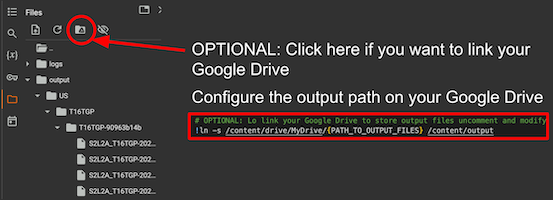

The output will contain 4 products:

*   S2L2Ax10_T[MGRS]-[DATE]-[UID]_MS.tif – 10-band multi-spectal image
*   S2L2Ax10_T[MGRS]-[DATE]-[UID]_TCI.tif – True colour RGB image
*   S2L2Ax10_T[MGRS]-[DATE]-[UID]_NDVI.tif – Pseudo-colour NDVI image
*   S2L2Ax10_T[MGRS]-[DATE]-[UID]_IRP.tif – Ifra-red preudo-colour image

The order of the 10 bands in the multi-spectral product is:
B02, B03, B04, B05, B06, B07, B08, B8A, B11, B12

# Installation

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Make sure to select T4 GPU instance from the Runtime/Change-runtime-type menu
# OPTIONAL: Lo link your Google Drive to store output files uncomment and modify the following line
!ln -s /content/drive/MyDrive/Semarang /content/output
!apt install -qq gdal-bin
!pip -q install https://storage.googleapis.com/0x7ff601307fa5/s2dr3-20250307.1-cp311-cp311-linux_x86_64.whl
!pip install --quiet xarray rioxarray

The following additional packages will be installed:
  python3-gdal python3-numpy
Suggested packages:
  libgdal-grass python-numpy-doc python3-pytest
The following NEW packages will be installed:
  gdal-bin python3-gdal python3-numpy
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 5,168 kB of archives.
After this operation, 25.6 MB of additional disk space will be used.
Selecting previously unselected package python3-numpy.
(Reading database ... 126109 files and directories currently installed.)
Preparing to unpack .../python3-numpy_1%3a1.21.5-1ubuntu22.04.1_amd64.deb ...
Unpacking python3-numpy (1:1.21.5-1ubuntu22.04.1) ...
Selecting previously unselected package python3-gdal.
Preparing to unpack .../python3-gdal_3.8.4+dfsg-1~jammy0_amd64.deb ...
Unpacking python3-gdal (3.8.4+dfsg-1~jammy0) ...
Selecting previously unselected package gdal-bin.
Preparing to unpack .../gdal-bin_3.8.4+dfsg-1~jammy0_amd64.deb ...
Unpacking gdal-bin (3.8.4+dfsg-1~jammy0) ...
Set

# Inference

In [5]:
import s2dr3.inferutils

# Specify the target location in the Lon,Lat (X,Y) format.
# The model will process a 4x4 km bounding box around the target location
lonlat = (110.420,-6.928) # NOTE THE X,Y FORMAT!

# Specify the target date. Please note, S2DR3 model will process the date
# from the Sentinel-2 catalogue that is closest to the specified date.
# Selected date may be ocluded by clouds. Please consult the Copernucus
# Dataspace for data availability https://browser.dataspace.copernicus.eu
# Archive images are available from 2018-01-01.
date = '2024-07-20'

# Due to high demand, the preview link may take some time to load.
# !!!Please note: the image below is just a small sample intended to indicate
# successful complition of the inference. Click the generated preview link
# to see the actual results.
s2dr3.inferutils.test(lonlat, date)

Fetching model: 100%|██████████| 829M/829M [00:11<00:00, 72.5MiB/s]


Fetching data for T49MDN-c21dbe396-20240721 

FileNotFoundError: [Errno 2] No such file or directory: '/content/output/ID'

# License

Copyright (c) Gamma Earth Sarl

The software is provided for testing, performance evaluation and validation. All rights are reserved by the copyright owner. For extended functionality and commercial use please contact info@gamma.earth

Please use the following citation for S2DR3-related academic publications:

Yosef Akhtman, S2DR3: Effective 10-Band 10x Single Image Super-Resolution for Sentinel-2. Medium: https://medium.com/@ya_71389/c71a601a2253

Please note that selected satellite images generated by anonymous users may be reused for publicity.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE

# Multi-points

In [4]:
# prompt: I want to do the process like in the previous cell but for many points, then join every band of the resulted GeoTIFF

from google.colab import drive
import s2dr3.inferutils
import os
from glob import glob
import rasterio
from rasterio.merge import merge
from rasterio.io import MemoryFile

# Mount Google Drive
drive.mount('/content/drive')

# Set the output directory (linking to Google Drive is recommended)
output_dir = '/content/output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Make sure to select T4 GPU instance from the Runtime/Change-runtime-type menu
#!apt install -qq gdal-bin
#!pip -q install https://storage.googleapis.com/0x7ff601307fa5/s2dr3-20250307.1-cp311-cp311-linux_x86_64.whl
#!pip install --quiet rioxarray

import rioxarray as rxr
import xarray as xr

# Define the list of locations and dates you want to process
# Example: A list of (lon, lat, date) tuples
points_to_process = [
    (110.39016261953073, -6.982608473266995, '2024-07-20'),
    (110.39012152416124, -7.01426754561142, '2024-07-20'),
    (110.42184798691154, -6.982648375415363, '2024-07-20'),
    (110.42180902643948, -7.014307630420192, '2024-07-20'),
    (110.45353353488242, -6.982686149341396, '2024-07-20'),
    (110.4534967093676, -7.014345577264278, '2024-07-20'),
    # Add more points as needed
]

# List to store the paths of the generated 10-band GeoTIFFs
output_ms_tiffs = []

# Process each point
for lon, lat, date_str in points_to_process:
    print(f"Processing location ({lon}, {lat}) for date {date_str}...")
    try:
        # S2DR3 will generate files in the output_dir
        s2dr3.inferutils.test((lon, lat), date_str)

        # Find the generated 10-band MS file
        # The naming convention is S2L2Ax10_T[MGRS]-[DATE]-[UID]_MS.tif
        # We need to find the exact file path
        search_pattern = os.path.join(output_dir, f'S2L2Ax10_T*-{date_str}-*_MS.tif')
        generated_files = glob(search_pattern)

        if generated_files:
            # Assuming only one MS file is generated per call for a specific date
            ms_file_path = generated_files[0]
            print(f"Generated MS file: {ms_file_path}")
            output_ms_tiffs.append(ms_file_path)
        else:
            print(f"No MS file found for location ({lon}, {lat}) and date {date_str} with pattern {search_pattern}")

    except Exception as e:
        print(f"Error processing location ({lon}, {lat}) for date {date_str}: {e}")




Output hidden; open in https://colab.research.google.com to view.

In [12]:
# prompt: I have 7 geotiff inside this folder /content/drive/MyDrive/Semarang/ID/T49MDN and I want to mosaic them

# Specify the folder containing the GeoTIFF files
geotiff_folder = '/content/drive/MyDrive/Semarang/ID/T49MDN_v0'

# Find all .tif files in the specified folder
geotiff_files = glob(os.path.join(geotiff_folder, '*.tif'))

if not geotiff_files:
    print(f"No GeoTIFF files found in {geotiff_folder}")
else:
    print(f"Found {len(geotiff_files)} GeoTIFF files to mosaic: {geotiff_files}")

    # Read the GeoTIFF files using rasterio
    src_files_to_mosaic = []
    for fp in geotiff_files:
        try:
            src = rasterio.open(fp)
            src_files_to_mosaic.append(src)
        except Exception as e:
            print(f"Error opening file {fp}: {e}")
            continue

    if not src_files_to_mosaic:
        print("No valid GeoTIFF files could be opened for mosaicking.")
    else:
        # Mosaic the files
        print("Mosaicking files...")
        mosaic, out_transform = merge(src_files_to_mosaic)

        # Copy the metadata from the first input file
        out_meta = src_files_to_mosaic[0].meta.copy()

        # Update the metadata with new dimensions, transform, and number of bands
        out_meta.update({
            "driver": "GTiff",
            "height": mosaic.shape[1],
            "width": mosaic.shape[2],
            "transform": out_transform,
            "count": mosaic.shape[0] # Number of bands in the mosaic
        })

        # Define the output filename
        output_mosaic_path = os.path.join(output_dir, 'semarang_mosaic.tif')

        # Write the mosaic to a new GeoTIFF file
        print(f"Writing mosaic to {output_mosaic_path}...")
        with rasterio.open(output_mosaic_path, "w", **out_meta) as dest:
            dest.write(mosaic)

        print("Mosaicking complete.")

        # Close the opened files
        for src in src_files_to_mosaic:
            src.close()



Found 6 GeoTIFF files to mosaic: ['/content/drive/MyDrive/Semarang/ID/T49MDN_v0/S2L2Ax10_T49MDN-6b94c98ea-20240721_MS.tif', '/content/drive/MyDrive/Semarang/ID/T49MDN_v0/S2L2Ax10_T49MDN-a65f2845d-20240721_MS.tif', '/content/drive/MyDrive/Semarang/ID/T49MDN_v0/S2L2Ax10_T49MDN-61c555d92-20240721_MS.tif', '/content/drive/MyDrive/Semarang/ID/T49MDN_v0/S2L2Ax10_T49MDN-5d09bef04-20240721_MS.tif', '/content/drive/MyDrive/Semarang/ID/T49MDN_v0/S2L2Ax10_T49MDN-b24705f20-20240721_MS.tif', '/content/drive/MyDrive/Semarang/ID/T49MDN_v0/S2L2Ax10_T49MDN-293fbd20b-20240721_MS.tif']
Mosaicking files...
Writing mosaic to /content/output/semarang_mosaic.tif...
Mosaicking complete.
